# Committor Guided Estimates of Molecular Transition Rates
Mitchell & Rotskoff
Presented by Connor Blake

In [5]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import MDAnalysis as mda
import mdshare
import mdtraj as md

In [6]:
local_filename = mdshare.fetch('alanine-dipeptide-nowater.pdb')
l0 = mdshare.fetch('alanine-dipeptide-0-250ns-nowater.xtc')
l1 = mdshare.fetch('alanine-dipeptide-1-250ns-nowater.xtc')
l2 = mdshare.fetch('alanine-dipeptide-2-250ns-nowater.xtc')

In [7]:
traj = md.load("alanine-dipeptide-0-250ns-nowater.xtc",top="alanine-dipeptide-nowater.pdb")

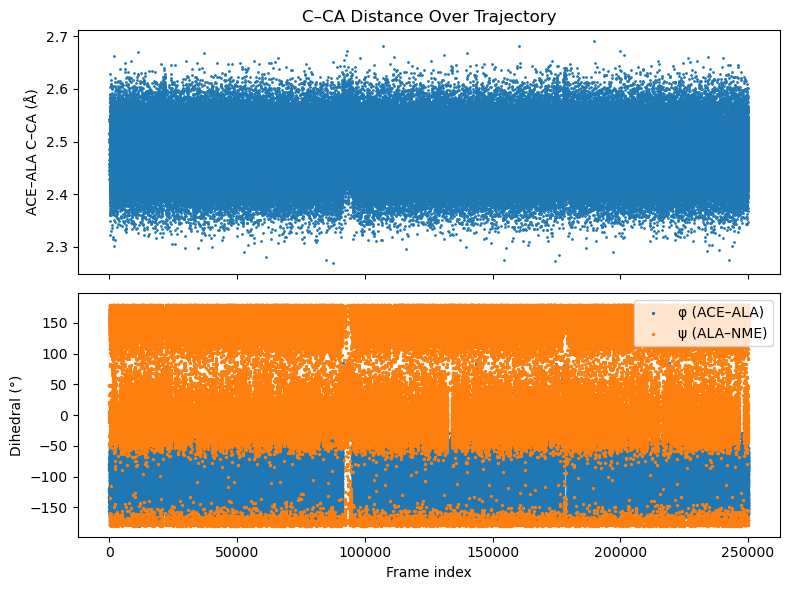

In [9]:
top = traj.topology
ace_c   = top.select('resname ACE and name C')[0]
ala_ca  = top.select('resname ALA and name CA')[0]
C_ACE, N_ALA, CA_ALA, C_ALA, N_NME = (
    top.select('resname ACE and name C')[0],
    top.select('resname ALA and name N')[0],
    top.select('resname ALA and name CA')[0],
    top.select('resname ALA and name C')[0],
    top.select('resname NME and name N')[0],
)

# 3) Compute distances vectorized (nm → Å)
distances = md.compute_distances(traj, [[ace_c, ala_ca]])[:, 0] * 10.0

# 4) Compute φ/ψ dihedrals vectorized (radians)
phi   = md.compute_dihedrals(traj, [[C_ACE, N_ALA, CA_ALA, C_ALA]])[:, 0]
psi   = md.compute_dihedrals(traj, [[N_ALA, CA_ALA, C_ALA, N_NME]])[:, 0]

# 5) Pack angles into a 2×N array (convert to degrees)
angles = np.vstack((np.degrees(phi), np.degrees(psi)))

# 6) Plot
frames = np.arange(traj.n_frames)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax[0].plot(frames, distances, '.', ms=2)
ax[0].set_ylabel('ACE–ALA C–CA (Å)')
ax[0].set_title('C–CA Distance Over Trajectory')

ax[1].scatter(frames, angles[0], s=2, label='φ (ACE–ALA)')
ax[1].scatter(frames, angles[1], s=2, label='ψ (ALA–NME)')
ax[1].set_ylabel('Dihedral (°)')
ax[1].set_xlabel('Frame index')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [1]:
phi.shape

NameError: name 'phi' is not defined